In [ ]:
# !pip install ace_tools_open
# !pip install  tabulate

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
from statsmodels.tsa.seasonal import seasonal_decompose
import ace_tools_open as tools

In [14]:

# STEP 1: Detect Encoding Automatically
file_path = "/Users/rahil/Documents/MRM DMMC/Superstore - store analysis.xlsx"  # Update with actual file path

# Load the dataset with detected encoding
df = pd.read_excel(file_path)
df.drop(["Row ID","Order ID","Customer ID","Product ID"], inplace=True, axis=1)
df['Sales'] = pd.to_numeric(df['Sales'])

# STEP 2: Convert 'Order Date' to datetime and set as index
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df.set_index('Order Date', inplace=True)

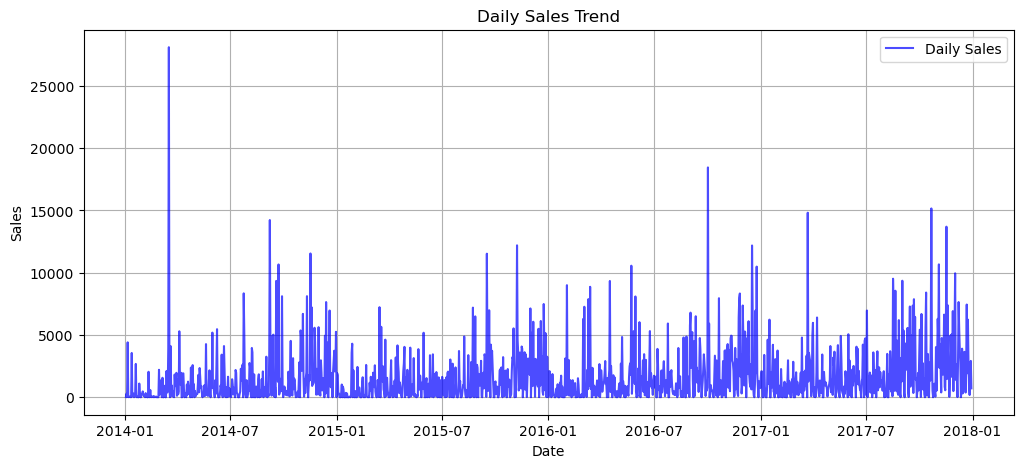

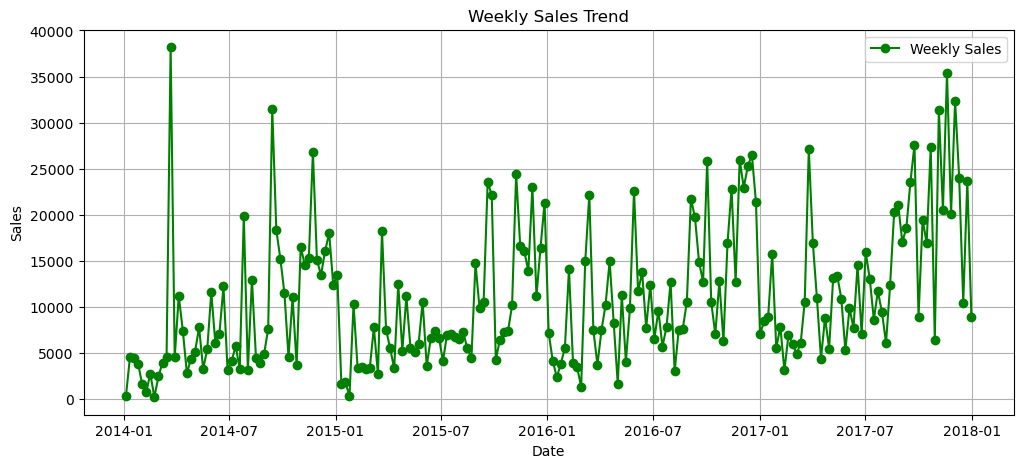

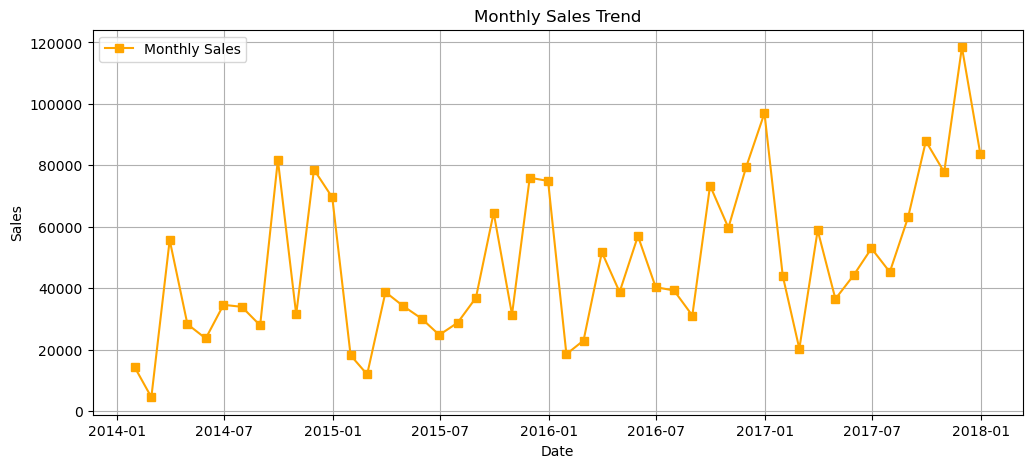

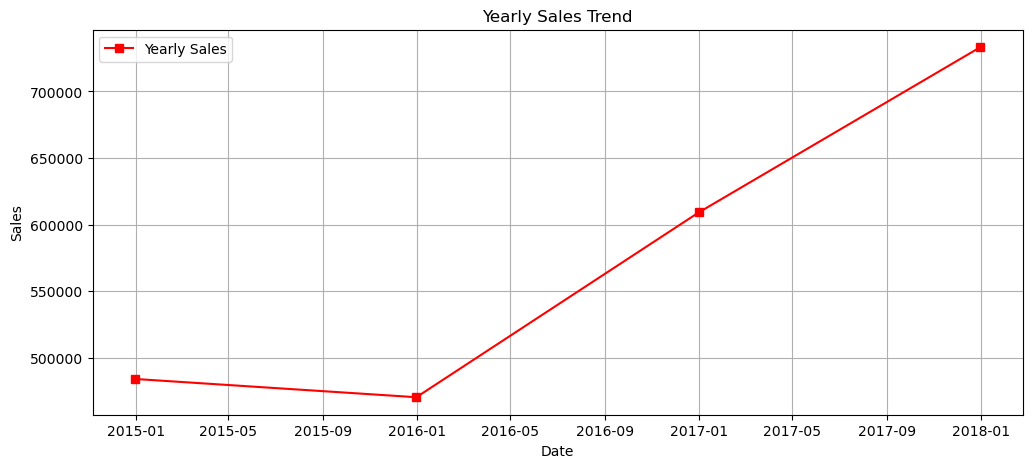

<Figure size 1200x800 with 0 Axes>

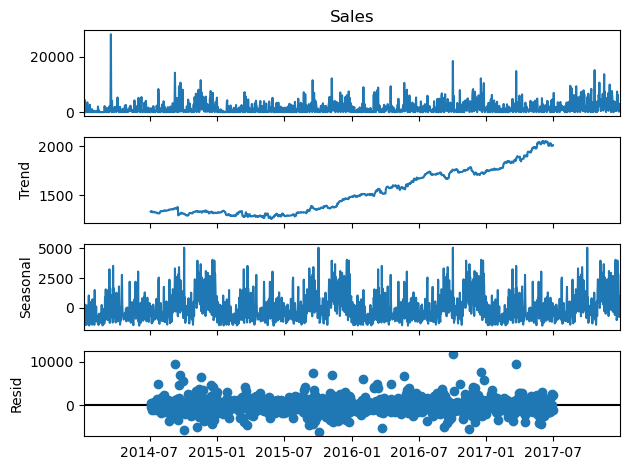

/var/folders/7w/kcxvdv_n14n3rmr6yf1fp8m00000gn/T/ipykernel_43055/2569077046.py:98: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  correlation_data = df[['Sales', 'Profit', 'Quantity']].resample('M').sum()


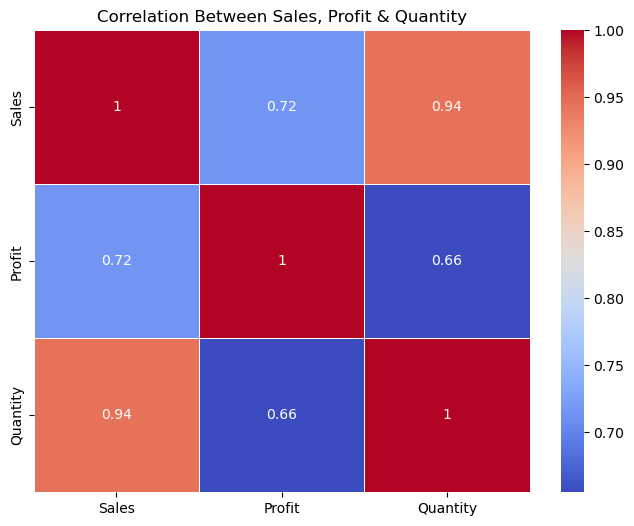

|   Daily Sales |   Weekly Sales |   Monthly Sales |   Yearly Sales |   Daily Profit |   Weekly Profit |   Monthly Profit |   Yearly Profit |   Daily Quantity |   Weekly Quantity |   Monthly Quantity |   Yearly Quantity |
|--------------:|---------------:|----------------:|---------------:|---------------:|----------------:|-----------------:|----------------:|-----------------:|------------------:|-------------------:|------------------:|
|        16.448 |        nan     |          nan    |            nan |         5.5512 |        nan      |          nan     |           nan   |                2 |               nan |                nan |               nan |
|       288.06  |        nan     |          nan    |            nan |       -65.9901 |        nan      |          nan     |           nan   |                8 |               nan |                nan |               nan |
|        19.536 |        324.044 |          nan    |            nan |         4.884  |        -55.5549 |        

In [30]:

# STEP 3: Aggregate Sales, Profit, and Quantity for Different Timeframes
daily_sales = df.resample('D')['Sales'].sum()
weekly_sales = df.resample('W')['Sales'].sum()
monthly_sales = df.resample('ME')['Sales'].sum()
yearly_sales = df.resample('YE')['Sales'].sum()

daily_profit = df.resample('D')['Profit'].sum()
weekly_profit = df.resample('W')['Profit'].sum()
monthly_profit = df.resample('ME')['Profit'].sum()
yearly_profit = df.resample('YE')['Profit'].sum()

daily_quantity = df.resample('D')['Quantity'].sum()
weekly_quantity = df.resample('W')['Quantity'].sum()
monthly_quantity = df.resample('ME')['Quantity'].sum()
yearly_quantity = df.resample('YE')['Quantity'].sum()

# STEP 4: Save Aggregated Data to CSV
aggregated_data = pd.DataFrame({
    "Daily Sales": daily_sales,
    "Weekly Sales": weekly_sales,
    "Monthly Sales": monthly_sales,
    "Yearly Sales": yearly_sales,
    "Daily Profit": daily_profit,
    "Weekly Profit": weekly_profit,
    "Monthly Profit": monthly_profit,
    "Yearly Profit": yearly_profit,
    "Daily Quantity": daily_quantity,
    "Weekly Quantity": weekly_quantity,
    "Monthly Quantity": monthly_quantity,
    "Yearly Quantity": yearly_quantity
})

# Save aggregated data
aggregated_data.to_csv("aggregated_time_series_data.csv")

# --- STEP 5: PLOT TRENDS ---

# Daily Sales Trend
plt.figure(figsize=(12, 5))
plt.plot(daily_sales, label="Daily Sales", color='blue', linestyle='-', alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Daily Sales Trend")
plt.legend()
plt.grid()
plt.show()

# Weekly Sales Trend
plt.figure(figsize=(12, 5))
plt.plot(weekly_sales, label="Weekly Sales", color='green', marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Weekly Sales Trend")
plt.legend()
plt.grid()
plt.show()

# Monthly Sales Trend
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales, label="Monthly Sales", color='orange', marker='s', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend")
plt.legend()
plt.grid()
plt.show()

# Yearly Sales Trend
plt.figure(figsize=(12, 5))
plt.plot(yearly_sales, label="Yearly Sales", color='red', marker='s', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Yearly Sales Trend")
plt.legend()
plt.grid()
plt.show()

# --- STEP 6: SEASONALITY ANALYSIS ---

# Seasonal Decomposition for Sales
decomposition = seasonal_decompose(daily_sales, model='additive', period=365)
seasonal_data = pd.DataFrame({
    "Trend": decomposition.trend,
    "Seasonal": decomposition.seasonal,
    "Residual": decomposition.resid
})

# Save seasonality data
seasonal_data.to_csv("seasonality_analysis.csv")

# Plot Seasonality Components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

# --- STEP 7: CORRELATION ANALYSIS ---

correlation_data = df[['Sales', 'Profit', 'Quantity']].resample('M').sum()
correlation_matrix = correlation_data.corr()

# Save correlation data
correlation_matrix.to_csv("correlation_analysis.csv")

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Sales, Profit & Quantity")
plt.show()

# --- STEP 8: DISPLAY RESULTS ---

# tools.display_dataframe_to_user(name="Aggregated Time Series Data", dataframe=aggregated_data.reset_index())

print(aggregated_data.to_markdown(index=False))